<h1>Results For Read Aligner Robustness<h1>


<h2>Samples and Tools<h2>


In [21]:
import os
from pathlib import Path


global read_009309
global read_181410
global read_183377

global samp_009390
global samp_181410
global samp_183377

read_009309 = 24237308
read_181410 = 44590098
read_183377 = 36747492

samp_009390 = "ERR009309_1_2"
samp_181410 = "ERR181410_1_2"
samp_183377 = "ERR183377_1_2"

all_samples=[samp_009390, samp_181410, samp_183377]
tools = ['bowtie2' , 'bowtie', 'subread' , 'smalt', 'STAR']

 
dirpath = os.getcwd()
# print("current directory is : " + dirpath)

# print(dirpath)
# foldername = os.path.basename(dirpath)
# print("Directory name is : " + foldername)
git_folder = str(Path(dirpath).parent)
print(git_folder)
# print(Path(dirpath).parent)

# print([os.path.abspath(name) for name in os.listdir(".") if os.path.isdir(name)])


/Users/pelin/projects/Read_Alignment/read.aligment.review


<h2>Load raw data, read csv_files<h2>

In [24]:
#import data
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from functools import reduce
import numpy as np

subread_df=pd.read_csv(git_folder + "/raw_data/csv_files/subread_results.csv")
smalt_df=pd.read_csv(git_folder + "/raw_data/csv_files/smalt_results.csv")
bowtie_df=pd.read_csv(git_folder + "/raw_data/csv_files/bowtie_results.csv")
bowtie2_df=pd.read_csv(git_folder + "/raw_data/csv_files/bowtie2_results.csv")
STAR_df=pd.read_csv(git_folder + "/raw_data/csv_files/STAR_results.csv")

tool_df=[subread_df, smalt_df, bowtie_df, bowtie2_df, STAR_df]
name_df=['subread', 'smalt','bowtie', 'bowtie2', 'STAR']

new_tool_df=[]

for t_df, n_df in zip(tool_df, name_df ):
#     print(n_df)
    t_df.insert(1,'#reads',None)
    t_df.insert(4,'%read1',None)
    t_df.insert(6,'%read2',None)
    t_df.insert(2,'tool',n_df)
    t_df.iloc[0:5,1] = read_009309
    t_df.iloc[5:10,1] = read_181410
    t_df.iloc[10:15,1] = read_183377
    # drop column about edit distance it it exists for now
    # bwa doesn't provide this info
    t_df = t_df.drop(['r_pe','rp_e','rpc_e','rce_p','rc_pe'], axis=1, errors='ignore')
    t_df['%read1']=round((t_df['unique mapped read 1'] * 100)/t_df['#reads'],2)
    t_df['%read2']=round((t_df['unique mapped read 2'] * 100)/t_df['#reads'],2)
    t_df.insert(loc=10, column='%com_read', value=round((t_df['reads'] * 100)/t_df['#reads'],2))

    new_tool_df.append(t_df)


# list of all tools and samples
new_tool_df[2]

# concat_df=reduce(lambda x, y: pd.concat([x, y]), new_tool_df)
# concat_df
# print(subread_df)




,sample,#reads,tool,original vs,unique mapped read 1,%read1,unique mapped read 2,%read2,intersected,reads,%com_read,rp,r_p,rp_c,rc_p,r_pc
0,ERR009309_1_2,24237308,bowtie,o,16657641,68.73,16657641,68.73,16657641,16657641,68.73,16657641,0,0,0,0
1,ERR009309_1_2,24237308,bowtie,s1,16657641,68.73,16657641,68.73,16657641,16657641,68.73,16657641,0,0,0,0
2,ERR009309_1_2,24237308,bowtie,s2,16657641,68.73,16657641,68.73,16657641,16657641,68.73,16657641,0,0,0,0
3,ERR009309_1_2,24237308,bowtie,s3,16657641,68.73,16657641,68.73,16657641,16657641,68.73,16657641,0,0,0,0
4,ERR009309_1_2,24237308,bowtie,rv,16657641,68.73,9043609,37.31,8959833,8959936,36.97,8959833,103,0,103,0
5,ERR181410_1_2,44590098,bowtie,o,36803493,82.54,36803493,82.54,36803493,36803493,82.54,36803493,0,0,0,0
6,ERR181410_1_2,44590098,bowtie,s1,36803493,82.54,36803493,82.54,36803493,36803493,82.54,36803493,0,0,0,0
7,ERR181410_1_2,44590098,bowtie,s2,36803493,82.54,36803493,82.54,36803493,36803493,82.54,36803493,0,0,0,0
8,ERR181410_1_2,44590098,bowtie,s3,36803493,82.54,36803493,82.54,36803493,36803493,82.54,36803493,0,0,0,0
9,ERR181410_1_2,44590098,bowtie,rv,36803493,82.54,36137879,81.04,36084960,36085008,80.93,36084960,48,0,48,0


<h2>Plot Bar Charts<h2>
<h3>Plot Bar Charts for Unique Mapped Reads<h3>


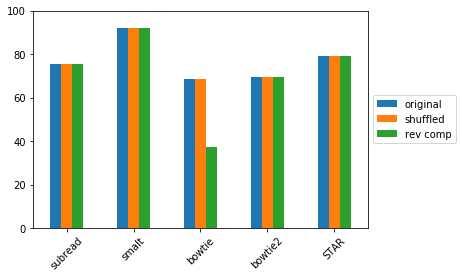

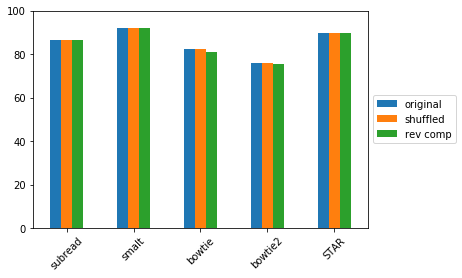

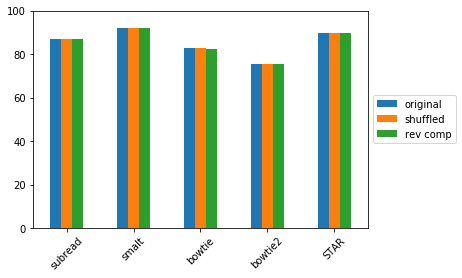

In [25]:
# bar plots 
# unique read mapped percentage

def plot_bar1(samp, h):
    appended_data = []
    cur_tool_df = []
    cur_tool = []
    for i in range((len(new_tool_df))):
        cur_tool = new_tool_df[i]
        read1_per=cur_tool[cur_tool['sample'] == samp]['%read1']
        read1_per = read1_per.iloc[0]
        cur_tool = cur_tool[cur_tool['sample'] == samp]
        cur_tool=cur_tool[h]
        headers = cur_tool.iloc[:,1]
#         print(headers)
        cur_tool_t=cur_tool.transpose()
        cur_tool=cur_tool_t.rename(columns=headers)
        cur_tool.insert(loc=0, column='original', value=read1_per)
        cur_tool=cur_tool.rename(index={'%read2': cur_tool.iloc[0,1]})
        cur_tool= cur_tool[3:]
        cols = ['o','s1','s2','s3']
        cur_tool.insert(loc = 1, column='shuffled', value = cur_tool[cols].astype(float).mean(axis=1))
#         cur_tool=cur_tool.drop(cols, axis=1)
        cur_tool =cur_tool.drop(cols, axis=1)
#         print(cur_tool)
        cur_tool_df.append(cur_tool)

    appended_data = pd.concat(cur_tool_df)

    ax=appended_data.plot(kind='bar')
    ax.set_ylim(bottom=0, top=100)
    plt.legend(['original', 'shuffled', 'rev comp'],
               loc='center left', bbox_to_anchor=(1.0, 0.5))

    plt.xticks(rotation=45)
#     plt.savefig(samp + ".png", bbox_inches='tight', dpi=100)

for i in range(len(all_samples)):
    plot_bar1(all_samples[i], ['tool', 'original vs', '%read1', '%read2'])





<h3>Plot Bar Charts for Common Reads<h3>

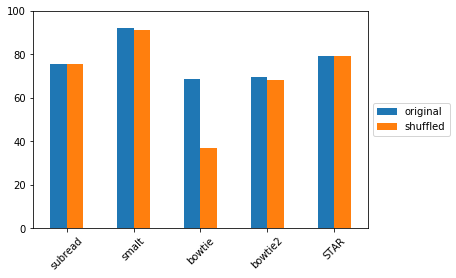

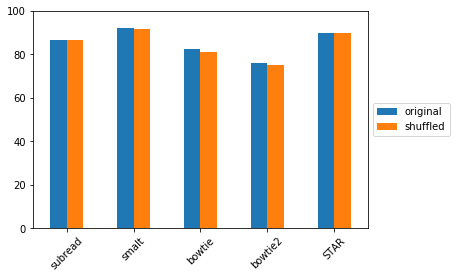

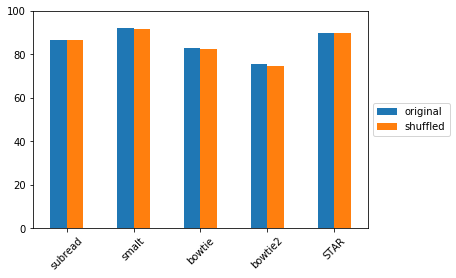

In [26]:
def plot_bar2(samp, h):
    appended_data = []
    cur_tool_df = []
    cur_tool = []
    for i in range((len(new_tool_df))):
        cur_tool = new_tool_df[i]
#         print(cur_tool)
        cur_tool[cur_tool['sample'] == samp]['%com_read']
        cur_tool = cur_tool[cur_tool['sample'] == samp]
        cur_tool=cur_tool[h]
        headers = cur_tool.iloc[:,1]
#         print(headers)
        cur_tool_t=cur_tool.transpose()
        cur_tool=cur_tool_t.rename(columns=headers)
        cur_tool=cur_tool.rename(index={'%com_read': cur_tool.iloc[0,1]})
        cur_tool= cur_tool[2:]
        cols = ['o','s1','s2','s3']
        cur_tool.insert(loc = 1, column='shuffled', value = cur_tool[cols].astype(float).mean(axis=1))
#         cur_tool=cur_tool.drop(cols, axis=1)
        cur_tool =cur_tool.drop(cols, axis=1)
#         print(cur_tool)
        cur_tool_df.append(cur_tool)

    appended_data = pd.concat(cur_tool_df)

    ax=appended_data.plot(kind='bar')
    ax.set_ylim(bottom=0, top=100)
    plt.legend(['original', 'shuffled', 'rev comp'],
               loc='center left', bbox_to_anchor=(1.0, 0.5))

    plt.xticks(rotation=45)

for i in range(len(all_samples)):
       plot_bar2(all_samples[i], ['tool', 'original vs','%com_read'])




<h3>Pie Charts for Same read Different Positions<h3>

   original vs        rp    r_p
10           o  31816491  41431
11          s1  31815947  41904
12          s2  31815608  42359
13          s3  31818106  39885
14          rv  31752247  58637
   original vs        rp  r_p
10           o  30496511    0
11          s1  30496511    0
12          s2  30496511    0
13          s3  30496511    0
14          rv  30184339   39
   original vs        rp   r_p
10           o  27747946     0
11          s1  27747946     0
12          s2  27747946     0
13          s3  27747946     0
14          rv  27392858  4829
   original vs        rp    r_p
10           o  33007451      0
11          s1  33007451      0
12          s2  33007451      0
13          s3  33007451      0
14          rv  32981151  12028


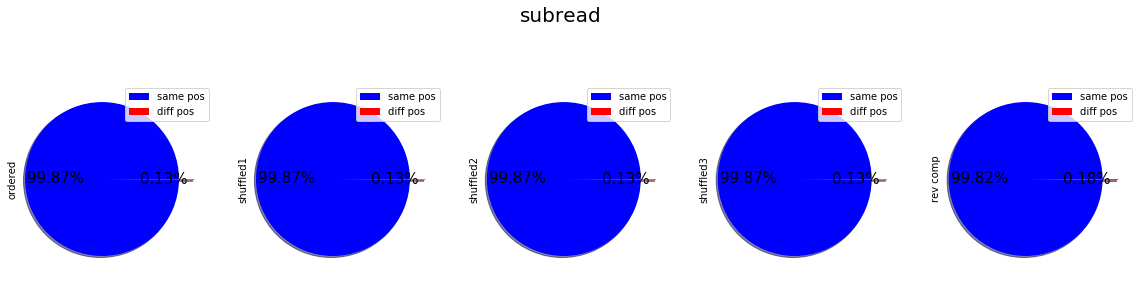

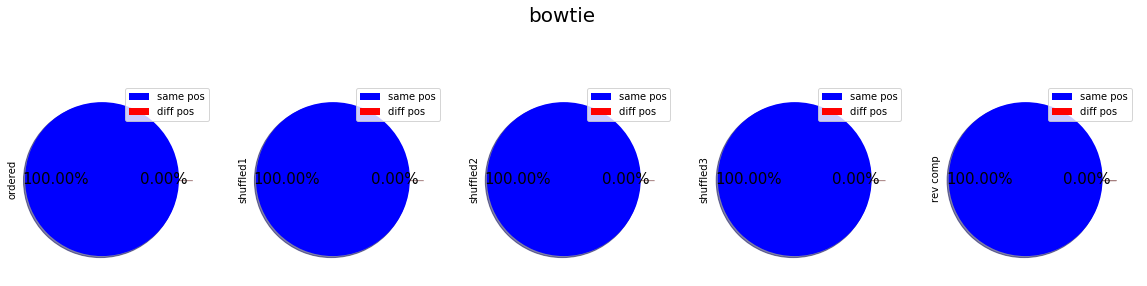

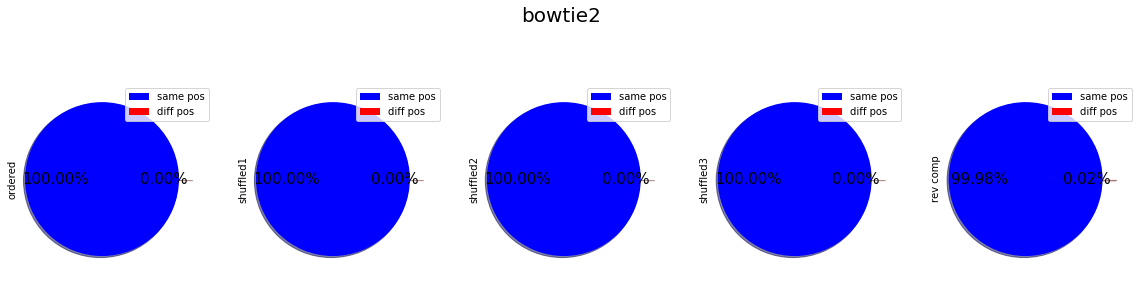

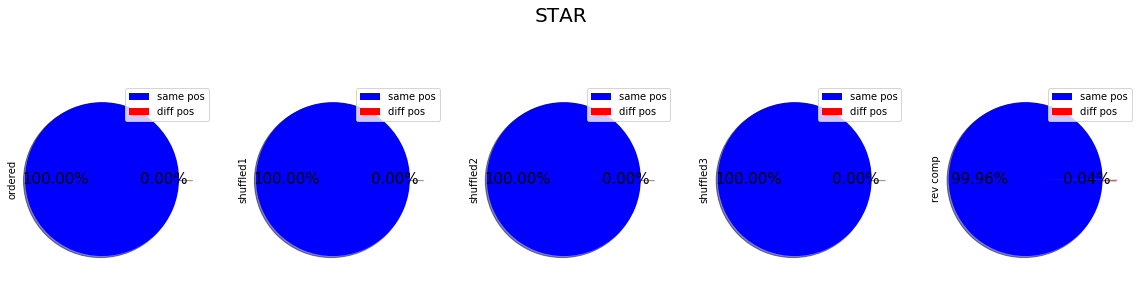

In [5]:
# pie charts
# diff pos, same pos
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger().setLevel(logging.CRITICAL)

def plot1(tool_df, samp, headers, title):
    tool_df=tool_df[tool_df['sample'] == samp]
    tool_df=tool_df[['original vs', 'rp' ,'r_p',]]
    print(tool_df)
    tool_df=tool_df.transpose()
    tool_df=tool_df[1:]
    tool_df.columns = headers


    sub_plots=tool_df.plot.pie(y=headers, subplots=True,labels=None, autopct='%1.2f%%', figsize =(20,5),
                     labeldistance=1, explode = (0.2, 0), colors=['blue', 'red'],fontsize = 15,
                              shadow=True)
    
    for j in range(len(sub_plots)):
        sub_plots[j].legend( loc="best", labels=['same pos', 'diff pos'])
    plt.suptitle(title, fontsize=20)
    
    
#     plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
#     ax1.set_title('Frauen', fontdict={'fontsize': 17})
    
#     plt.rcParams['font.weight'] = 1
#     plt.savefig(title + "_" + samp + ".png", bbox_inches='tight', dpi=50)



head=["ordered", "shuffled1", "shuffled2", "shuffled3", "rev comp"]

# for i in range(len(all_samples)):
for i in range(1):
    plot1(subread_df, all_samples[2], head,'subread')
    plot1(bowtie_df, all_samples[2], head, 'bowtie')
    plot1(bowtie2_df, all_samples[2], head, 'bowtie2')
    plot1(STAR_df, all_samples[2], head, 'STAR')






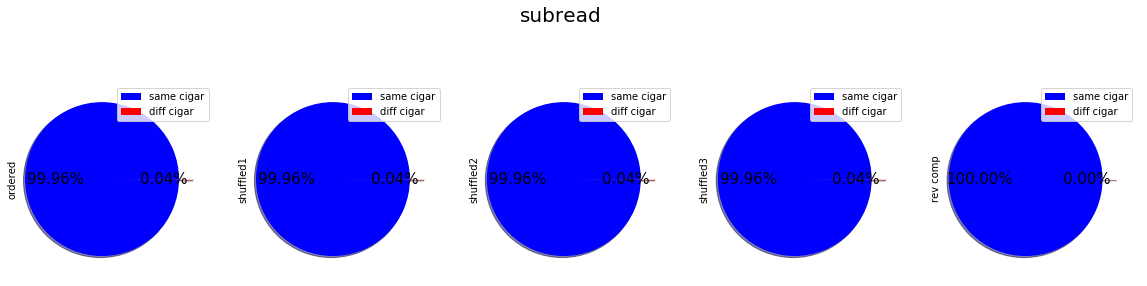

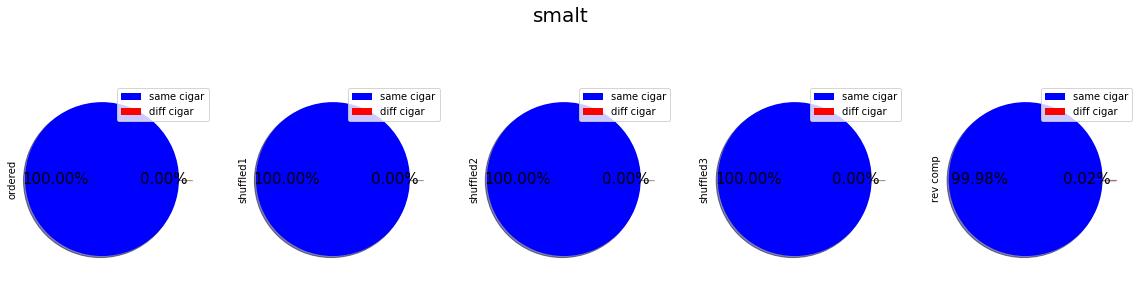

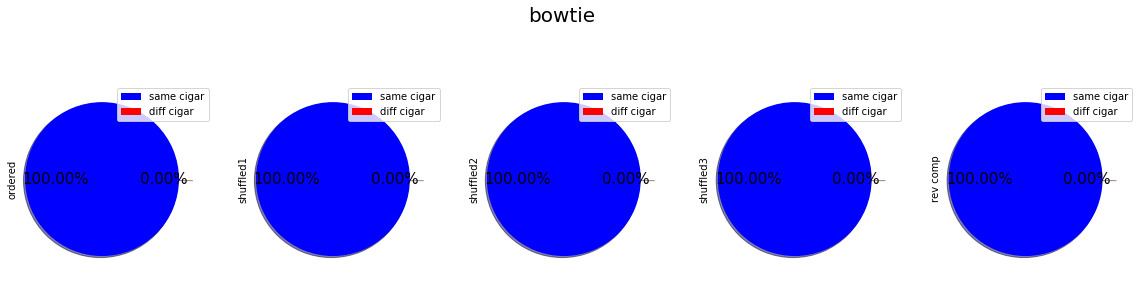

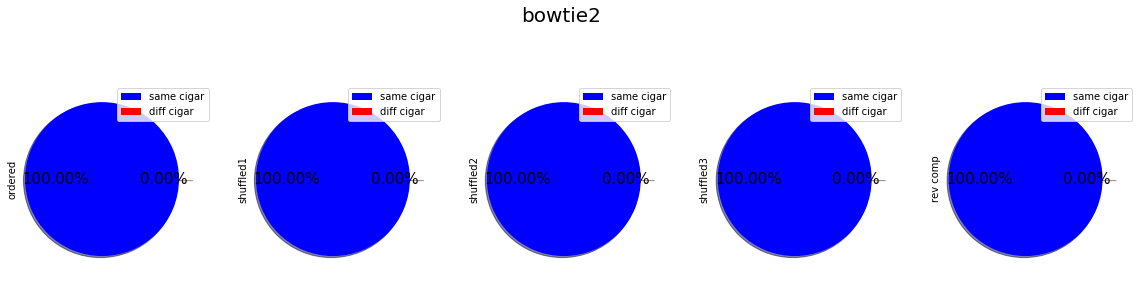

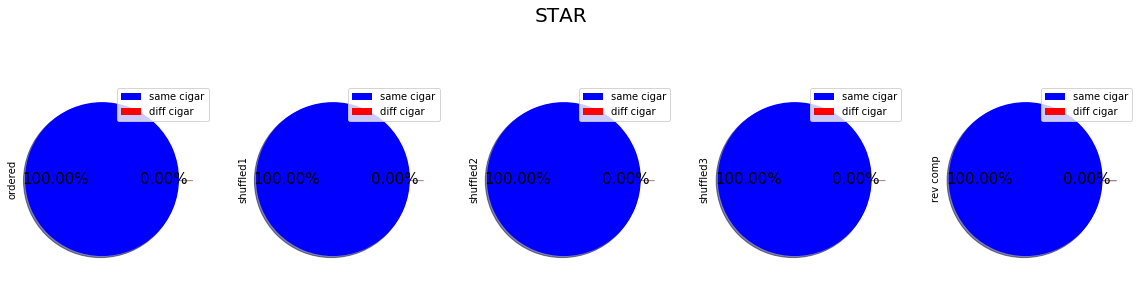

In [6]:
# pie charts
# pie chart same pos same read diff cigar

import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger().setLevel(logging.CRITICAL)

def plot1(tool_df, samp, headers, title):
    tool_df=tool_df[tool_df['sample'] == samp]
    tool_df=tool_df[['original vs', 'rp' ,'rp_c',]]
    tool_df.insert(loc = 1, column='rpc',value = tool_df['rp'] - tool_df['rp_c'])
#     tool_df = tool_df.drop(['rp'])
    tool_df = tool_df.drop(['rp'], axis=1)
#     print(tool_df)
#     cur_tool.insert(loc=0, column='original', value=read1_per)
    tool_df=tool_df.transpose()
    tool_df=tool_df[1:]
    tool_df.columns = headers


    sub_plots=tool_df.plot.pie(y=headers, subplots=True,labels=None, autopct='%1.2f%%', figsize =(20,5),
                     labeldistance=1, explode = (0.2, 0), colors=['blue', 'red'],fontsize = 15, shadow=True)
    
    for j in range(len(sub_plots)):
        sub_plots[j].legend( loc="best", labels=['same cigar', 'diff cigar'])
    plt.suptitle(title, fontsize=20)
    
    
#     plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
#     ax1.set_title('Frauen', fontdict={'fontsize': 17})
    
#     plt.rcParams['font.weight'] = 1
    plt.savefig(title + "_" + samp + ".png", bbox_inches='tight', dpi=50)



head=["ordered", "shuffled1", "shuffled2", "shuffled3", "rev comp"]

# for i in range(len(all_samples)):
for i in range(1):
    plot1(subread_df, all_samples[0], head,'subread')
    plot1(smalt_df, all_samples[2], head, 'smalt')
    plot1(bowtie_df, all_samples[2], head, 'bowtie')
    plot1(bowtie2_df, all_samples[2], head, 'bowtie2')
    plot1(STAR_df, all_samples[2], head, 'STAR')




[array([ 11.67722054,  -1.56205051,   2.241534  ,   3.65262106,
        -6.80214953,   4.75940782,   5.61725167,   1.27836578,
         6.50665422, -10.46632823,  -1.72787939,  -0.52776837,
        -1.26410367,  -7.94338441,   1.12083704,  -7.25505544,
         3.6207771 ,  -2.1430844 ,   4.54547525,  -1.98023041,
        17.18862066,  -4.70895821,   4.90995383,  -3.00700915,
         2.84000098,   5.97231557,   9.38759464,  -5.17709182,
        -2.13951362,  -2.0243538 ,   2.24615011,  -2.62305652,
         1.79826401,   6.65046015,  15.92941284,  -2.02937577,
        -3.6400853 ,   5.80793148,   1.06849139,   8.13192547,
        -2.38720048,  -4.55848046,   2.73237716,   8.65302217,
        -5.58965089,   4.36707528,  13.34475519,   1.3783502 ,
        -0.46958292,   6.05852386,   0.71243765,   6.4990353 ,
        -9.99678186,  11.89048589,   6.64993497,   1.80767665,
        -4.05846215, -10.84309042,   3.99206051,  -2.40546653,
        -7.22081512,   5.36289277,   7.37649051,  -6.2

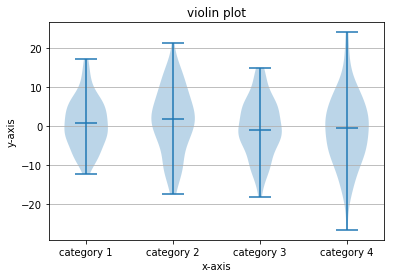

In [60]:
# import numpy as np
# import matplotlib.pyplot as plt
# # if using a Jupyter notebook, include:
# %matplotlib inline

# # generate some random data
# data1 = np.random.normal(0, 6, 100)
# data2 = np.random.normal(0, 7, 100)
# data3 = np.random.normal(0, 8, 100)
# data4 = np.random.normal(0, 9, 100)
# data = list([data1, data2, data3, data4])
# print(data)


# fig, ax = plt.subplots()


# # build a violin plot
# ax.violinplot(data, showmeans=False, showmedians=True)


# # add title and axis labels
# ax.set_title('violin plot')
# ax.set_xlabel('x-axis')
# ax.set_ylabel('y-axis')


# # add x-tick labels
# xticklabels = ['category 1', 'category 2', 'category 3', 'category 4']
# ax.set_xticks([1,2,3,4])
# ax.set_xticklabels(xticklabels)


# # add horizontal grid lines
# ax.yaxis.grid(True)

# # show the plot
# plt.show()

In [80]:
# import glob, os
# import seaborn as sns
# import pandas as pd
# import matplotlib.pyplot as plt
# from functools import reduce
# import numpy as np

# os.chdir(git_folder + '/raw_data/txt_files')
# df_file = []
# df_file_txt = []
# for file in glob.glob(tools[2] + "_" + samp_009390 + "_*.txt"):
#     df_file.append(file)
#     df_file_txt.append(dd.read_csv(file, header=None))
# # print(df_file)
# # print(df_file_txt)
# data = []
# category = []
# for i in range(len(df_file_txt)):
#     data.append(np.asarray(df_file_txt[i]))
#     category.append(df_file[i])
    
# # f = plt.figure()

# for j in range(len(category)):
#     print(category[j])
#     fig, ax = pyplot.subplots(figsize=(5, 5))
#     ax.autoscale(enable=True)
#     sns.violinplot(ax=ax, y=data[j])
#     fig.savefig(category[j] + ".png", bbox_inches='tight', dpi=100)






[Text(0, 0, 'o'),
 Text(0, 0, 'rv'),
 Text(0, 0, 's1'),
 Text(0, 0, 's2'),
 Text(0, 0, 's3')]

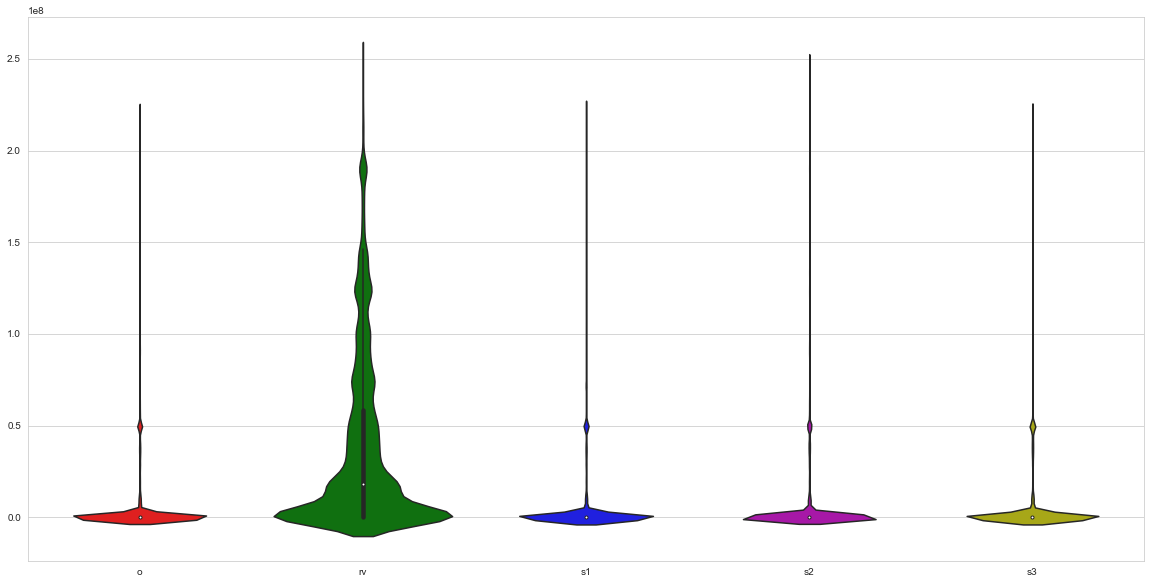

In [444]:
import glob, os
import sys
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
from statistics import median


os.chdir(git_folder + '/raw_data/txt_files')
df_file = []
df_file_txt = []


files = sorted(glob.glob(tools[2] + "_" + samp_181410 + "_*.txt"))

# l = []
# for f in files:
#     if "o" in f:
#         l[1] = 
#     print("rv" in f)

for file in files: 
#     print(file)
    df_file.append(file)
    df_file_txt.append(pd.read_csv(file, header=None))
#   df_file=sorted(df_file)
# print(df_file)
data = [None,None,None,None,None]

for i in range(len(df_file_txt)):
#     print(df_file[i])
    if "_o-" in df_file[i]:
        data[0] = np.asarray(df_file_txt[i])
    elif "_rv-" in df_file[i]:
        data[1]=np.asarray(df_file_txt[i])

    elif "_s1-" in df_file[i]:
        data[2]=np.asarray(df_file_txt[i])
    elif "_s2-" in df_file[i]:
        data[3]=np.asarray(df_file_txt[i])
    elif "_s3-" in df_file[i]:
        data[4]=np.asarray(df_file_txt[i])

data=[np.asarray(0) if v is None else v for v in data]
# print(data)

# print(len(data))
# for n in range(len(data),5):
# for f in files:
#     if "_o" not in f:
#         data.insert(0,0)
#     if "_rv" not in f:
#         data.insert(1,0)
#     if "_s1" not in f:
#         data.insert(2,0)
#     if "_s2" not in f:
#         data.insert(3,0)
#     if "_s3" not in f:
#         data.insert(4,0)
# print(data)
# # show the plot
# plt.show()
sns.set_style('whitegrid')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 10)
# sns.violinplot(data=d, inner="points", ax=ax) 
# print(len(data))
sns.violinplot(data=data,  palette=['r','g','b','m','y'], inner='box', scale='count')
ax.set_xticklabels(['o','rv','s1','s2','s3'])
# ax.set(ylim=(10, 5, 40))

# print(min(data[1]))
# print(max(data[1]))
# print(median(data[1]))
# a = [-2,3,4]
# print(min(a))
